<a href="https://colab.research.google.com/github/moons54/IA_P8/blob/main/P8_02_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PROJET 08
---
Participer à la conception d'une voiture Autonome

----

**Equipe 3 :  Segmentation des images**


---
Objectif : 
Concevoir un premier modèle de segmentation d'images


___
Plan d'action :

[![](https://mermaid.ink/img/eyJjb2RlIjoiICBqb3VybmV5XG4gICAgdGl0bGUgUHJvZ3JhbW1lIGRlIGRlcGxvaWVtZW50IFxuICAgIHNlY3Rpb24gUHLDqXBhcmF0aW9uIGRlcyBkb25uw6llc1xuICAgICAgY29uc3RydWN0aW9uIGRlIGxhIGJhc2UgZGUgZG9ubsOpZSA6IDc6IE1vaSwgTWVudG9yIFxuICAgICAgU8OpcGFyYXRpb24gZGUgZG9ubsOpZXMgOiAzOiBNb2lcbiAgICAgIFZpc3VhbGlzYXRpb24gZGVzIGRvbm7DqWVzOiA0OiBNb2lcbiAgICBzZWN0aW9uIE1pc2UgZW4gcGxhY2UgZCd1biBtb2RlbGUgcHLDqWRpY3RpZlxuICAgICAgUmVjaGVyY2hlIGRlcyBtb2TDqGxlcyBwZXJmb3JtYW50czogNTogTW9pXG4gICAgICBFbnRyYWluZW1lbnQgZCd1biBwcmVtaWVyIG1vZMOobGUgZGUgcHLDqWRpY3Rpb246IDM6IE1vaVxuICAgICAgIiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZSwiYXV0b1N5bmMiOnRydWUsInVwZGF0ZURpYWdyYW0iOmZhbHNlfQ)](https://mermaid-js.github.io/mermaid-live-editor/edit/#eyJjb2RlIjoiICBqb3VybmV5XG4gICAgdGl0bGUgUHJvZ3JhbW1lIGRlIGRlcGxvaWVtZW50IFxuICAgIHNlY3Rpb24gUHLDqXBhcmF0aW9uIGRlcyBkb25uw6llc1xuICAgICAgY29uc3RydWN0aW9uIGRlIGxhIGJhc2UgZGUgZG9ubsOpZSA6IDc6IE1vaSwgTWVudG9yIFxuICAgICAgU8OpcGFyYXRpb24gZGUgZG9ubsOpZXMgOiAzOiBNb2lcbiAgICAgIFZpc3VhbGlzYXRpb24gZGVzIGRvbm7DqWVzOiA0OiBNb2lcbiAgICBzZWN0aW9uIE1pc2UgZW4gcGxhY2UgZCd1biBtb2RlbGUgcHLDqWRpY3RpZlxuICAgICAgUmVjaGVyY2hlIGRlcyBtb2TDqGxlcyBwZXJmb3JtYW50czogNTogTW9pXG4gICAgICBFbnRyYWluZW1lbnQgZCd1biBwcmVtaWVyIG1vZMOobGUgZGUgcHLDqWRpY3Rpb246IDM6IE1vaVxuICAgICAgIiwibWVybWFpZCI6IntcbiAgXCJ0aGVtZVwiOiBcImRlZmF1bHRcIlxufSIsInVwZGF0ZUVkaXRvciI6ZmFsc2UsImF1dG9TeW5jIjp0cnVlLCJ1cGRhdGVEaWFncmFtIjpmYWxzZX0)

- Entrainer et deployer un modele de segmentation incluant 8 catégories principales
- Utilisation de l'API FLASK pour le deploiement


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os, shutil
from matplotlib.image import imread
from tensorflow.keras.utils import Sequence
from tqdm.notebook import tqdm, trange
import requests, zipfile, io
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
import tensorflow as tf
from PIL import ImageOps
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adadelta, Nadam
from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.utils import multi_gpu_model, plot_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy
# from multiclassunet import Unet
import tqdm
import cv2
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import Callback


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### repertoire de travail

In [3]:
### Path source 
PATH_GTFINE_TRAIN = "/content/gtFine/train"
PATH_LEFTIMG8B_TRAIN = "/content/leftImg8bit/train"
PATH_GTFINE_TEST = "/content/gtFine/test"
PATH_LEFTIMG8B_TEST = "/content/leftImg8bit/test"
PATH_GTFINE_VAL = "/content/gtFine/val"
PATH_LEFTIMG8B_VAL = "/content/leftImg8bit/val"

## Path destination 
PATH_IMAGES_TRAIN = "/content/drive/MyDrive/data/train/images"
PATH_MASKS_TRAIN = "/content/drive/MyDrive/data/train/masks"
PATH_IMAGES_TEST = "/content/drive/MyDrive/data/test/images"
PATH_MASKS_TEST = "/content/drive/MyDrive/data/test/masks"
PATH_IMAGES_VAL = "/content/drive/MyDrive/data/val/images"
PATH_MASKS_VAL = "/content/drive/MyDrive/data/val/masks"

In [ ]:
import os

source_directory = "model"

os.makedirs(source_directory, exist_ok=True)

### constitution des données 

In [4]:
def listImg_Mask(path_image,path_masks):
  image_list = [f for f in glob.iglob(os.path.join(path_image, "*.png"))]
  mask_list = [f for f in glob.iglob(os.path.join(path_masks, "*.png"))]
  image_list.sort()
  mask_list.sort()
  print(f'. . . . .Number of images: {len(image_list)}\n. . . . .Number of masks: {len(mask_list)}')
  return image_list,mask_list

image_list, mask_list = listImg_Mask(path_image=PATH_IMAGES_TRAIN,path_masks=PATH_MASKS_TRAIN)
val_image_list, val_mask_list = listImg_Mask(path_image=PATH_IMAGES_VAL,path_masks=PATH_MASKS_VAL)


for i in range(len(image_list)):
    assert image_list[i][16:] != mask_list[i][24:]

. . . . .Number of images: 2975
. . . . .Number of masks: 2975
. . . . .Number of images: 500
. . . . .Number of masks: 500


In [5]:
from sklearn.model_selection import train_test_split


nous redécoupons l'echantillon principal car l'echantillon de test est erronnée.


In [6]:
image_list_train, image_list_test, mask_list_train, mask_list_test = train_test_split(image_list,mask_list, test_size=0.2, random_state=42)


In [7]:
print(f'. . . . .Number of images train: {len(image_list_train)}\n. . . . .Number of masks train: {len(mask_list_train)}')
print(f'. . . . .Number of images test: {len(image_list_test)}\n. . . . .Number of masks test: {len(mask_list_test)}')


. . . . .Number of images train: 2380
. . . . .Number of masks train: 2380
. . . . .Number of images test: 595
. . . . .Number of masks test: 595


### constitution des methodes d'Augmentation via l'albumentation

In [8]:
import albumentations as A
A.__version__

'0.1.12'

In [39]:
batch_size = 20
data_sample = 3000
steps = data_sample//batch_size
img_height, img_width = 256, 256
class_nb = 8

In [40]:
def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        # A.PadIfNeeded(384, 480)
        A.PadIfNeeded(min_height=x_min, min_width=y_min, always_apply=True, border_mode=0),
    ]
    return A.Compose(test_transform)

In [41]:
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

x_min = (128 - img_width) // 2
y_min = (128 - img_height) // 2


# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        A.HorizontalFlip(p=0.5),

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        A.PadIfNeeded(min_height=x_min, min_width=y_min, always_apply=True, border_mode=0),
        A.RandomCrop(height=img_height, width=img_width, always_apply=True),


        A.RandomBrightness(p=0.5),
        A.RandomContrast(p=0.5),
    ]
    return A.Compose(train_transform)

### definition des metriques de travail

In [42]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

def total_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + (3*dice_loss(y_true, y_pred))
    return loss

cats = {'void': [0, 1, 2, 3, 4, 5, 6],
 'flat': [7, 8, 9, 10],
 'construction': [11, 12, 13, 14, 15, 16],
 'object': [17, 18, 19, 20],
 'nature': [21, 22],
 'sky': [23],
 'human': [24, 25],
 'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]}

### constitution des différents datagen

In [43]:
class seg_gen(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentation):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augmentation = augmentation

        

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        idx = np.random.randint(0, data_sample, batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
          _image = img_to_array(load_img(f'{image_list[i]}', target_size=(img_height, img_width)))/255.
          img = img_to_array(load_img(f'{mask_list[i]}', color_mode="grayscale", target_size=(img_height, img_width)))
          
          sample = self.augmentation(image=_image, mask=img) #
          _image_aug, _mask_aug = sample['image'], sample['mask']

          labels = np.unique(img)
          # labels_aug = np.unique(img_aug)
          if len(labels) < 3:
              idx = np.random.randint(0, data_sample, batch_size-drawn)
              continue
          img = np.squeeze(img)
          _mask_aug = np.squeeze(_mask_aug)
          mask = np.zeros((img.shape[0], img.shape[1], 8))
          mask_aug = np.zeros((_mask_aug.shape[0], _mask_aug.shape[1], 8))
          for i in range(-1, 34):
              if i in cats['void']:
                  mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                  mask_aug[:,:,0] = np.logical_or(mask_aug[:,:,0],(_mask_aug==i))
              elif i in cats['flat']:
                  mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                  mask_aug[:,:,1] = np.logical_or(mask_aug[:,:,1],(_mask_aug==i))
              elif i in cats['construction']:
                  mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                  mask_aug[:,:,2] = np.logical_or(mask_aug[:,:,2],(_mask_aug==i))
              elif i in cats['object']:
                  mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                  mask_aug[:,:,3] = np.logical_or(mask_aug[:,:,3],(_mask_aug==i))
              elif i in cats['nature']:
                  mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                  mask_aug[:,:,4] = np.logical_or(mask_aug[:,:,4],(_mask_aug==i))
              elif i in cats['sky']:
                  mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                  mask_aug[:,:,5] = np.logical_or(mask_aug[:,:,5],(_mask_aug==i))
              elif i in cats['human']:
                  mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                  mask_aug[:,:,6] = np.logical_or(mask_aug[:,:,6],(_mask_aug==i))
              elif i in cats['vehicle']:
                  mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))
                  mask_aug[:,:,7] = np.logical_or(mask_aug[:,:,7],(_mask_aug==i))


          batch_y.append(mask)
          batch_x.append(_image)
          batch_y.append(mask_aug)
          batch_x.append(_image_aug)
          drawn += 1
        return np.array(batch_x), np.array(batch_y)

In [44]:
class seg_gen_val(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentation):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augmentation = augmentation

        

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        idx = np.random.randint(0, data_sample, batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
          _image = img_to_array(load_img(f'{image_list[i]}', target_size=(img_height, img_width)))/255.
          img = img_to_array(load_img(f'{mask_list[i]}', color_mode="grayscale", target_size=(img_height, img_width)))
          
          sample = self.augmentation(image=_image, mask=img) #
          _image_aug, _mask_aug = sample['image'], sample['mask']

          labels = np.unique(img)
          # labels_aug = np.unique(img_aug)
          if len(labels) < 3:
              idx = np.random.randint(0, data_sample, batch_size-drawn)
              continue
          img = np.squeeze(img)
          _mask_aug = np.squeeze(_mask_aug)
          mask = np.zeros((img.shape[0], img.shape[1], 8))
          mask_aug = np.zeros((_mask_aug.shape[0], _mask_aug.shape[1], 8))
          for i in range(-1, 34):
              if i in cats['void']:
                  mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                  mask_aug[:,:,0] = np.logical_or(mask_aug[:,:,0],(_mask_aug==i))
              elif i in cats['flat']:
                  mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                  mask_aug[:,:,1] = np.logical_or(mask_aug[:,:,1],(_mask_aug==i))
              elif i in cats['construction']:
                  mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                  mask_aug[:,:,2] = np.logical_or(mask_aug[:,:,2],(_mask_aug==i))
              elif i in cats['object']:
                  mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                  mask_aug[:,:,3] = np.logical_or(mask_aug[:,:,3],(_mask_aug==i))
              elif i in cats['nature']:
                  mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                  mask_aug[:,:,4] = np.logical_or(mask_aug[:,:,4],(_mask_aug==i))
              elif i in cats['sky']:
                  mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                  mask_aug[:,:,5] = np.logical_or(mask_aug[:,:,5],(_mask_aug==i))
              elif i in cats['human']:
                  mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                  mask_aug[:,:,6] = np.logical_or(mask_aug[:,:,6],(_mask_aug==i))
              elif i in cats['vehicle']:
                  mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))
                  mask_aug[:,:,7] = np.logical_or(mask_aug[:,:,7],(_mask_aug==i))


          batch_y.append(mask)
          batch_x.append(_image)
          batch_y.append(mask_aug)
          batch_x.append(_image_aug)
          drawn += 1
        return np.array(batch_x), np.array(batch_y)

In [15]:
train_gen = seg_gen(image_list_train, mask_list_train, batch_size, augmentation=get_training_augmentation())

In [16]:
val_gen = seg_gen_val(val_image_list, val_mask_list, batch_size, augmentation=get_validation_augmentation())

In [50]:
test_gen = seg_gen(image_list_test, mask_list_test, batch_size, augmentation=get_validation_augmentation())

In [18]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [19]:
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

## Constitution des datagens
- Partie I sans augmentation 
- PArtie II avece augmentation

### Sans augmentation

In [ ]:
batch_size = 20
data_sample = 1000
steps = data_sample//batch_size
img_height, img_width = 256, 256
classes = 8
filters_n = 64

In [28]:
train_gen_aug = seg_gen(image_list_train, mask_list_train, batch_size,augmentation=get_training_augmentation())
test_gen_aug = seg_gen(image_list_test, mask_list_test, batch_size,augmentation=get_validation_augmentation())
val_gen_aug = seg_gen(val_image_list, val_mask_list, batch_size,augmentation=get_validation_augmentation())

In [27]:
train_gen = seg_gen(image_list_train, mask_list_train, batch_size,augmentation=get_validation_augmentation())
test_gen = seg_gen(image_list_test, mask_list_test, batch_size,augmentation=get_validation_augmentation())
val_gen = seg_gen(val_image_list, val_mask_list, batch_size,augmentation=get_validation_augmentation())

## Mise en place Model



[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcbiAgICBBW0lucHV0XSAtLT58Y2xhc3MgM3wgQihlbnRyYWluZW1lbnQpXG4gICAgQiAtLT4gQ3tpbWFnZSBzZWdtZW50YXRpb259XG4gICAgQyAtLT58T25lfCBEW3ZvaWRdXG4gICAgQyAtLT58VHdvfCBFW2ZhOmZhLXJvYWQgVm9pZF1cbiAgICBDIC0tPnxUaHJlZXwgRltmYTpmYS1jYXIgdmVoaWN1bGVdXG4gICAgQyAtLT58Rm91cnwgR1tmYTpmYS11c2VyIGh1bWFuXVxuICAgIEMgLS0-fEZpdmV8IEhbZmE6ZmEtdHJlZSBuYXR1cmVdXG4gICAgQyAtLT58U2l4fCBJW2ZhOmZhLWJ1aWxkaW5nIGNvbnN0cnVjdGlvbl1cbiAgICBDIC0tPnxTZXZlbnwgSltmYTpmYS1vYmplY3Qgb2JqZXRdXG4gICAgQyAtLT58RWlnaHR8IEtbZmE6ZmEtY2xvdWQtbW9vbiBza3ldXG4gICIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0In0sInVwZGF0ZUVkaXRvciI6ZmFsc2UsImF1dG9TeW5jIjp0cnVlLCJ1cGRhdGVEaWFncmFtIjpmYWxzZX0)](https://mermaid-js.github.io/mermaid-live-editor/edit/#eyJjb2RlIjoiZ3JhcGggVERcbiAgICBBW0lucHV0XSAtLT58Y2xhc3MgM3wgQihlbnRyYWluZW1lbnQpXG4gICAgQiAtLT4gQ3tpbWFnZSBzZWdtZW50YXRpb259XG4gICAgQyAtLT58T25lfCBEW3ZvaWRdXG4gICAgQyAtLT58VHdvfCBFW2ZhOmZhLXJvYWQgVm9pZF1cbiAgICBDIC0tPnxUaHJlZXwgRltmYTpmYS1jYXIgdmVoaWN1bGVdXG4gICAgQyAtLT58Rm91cnwgR1tmYTpmYS11c2VyIGh1bWFuXVxuICAgIEMgLS0-fEZpdmV8IEhbZmE6ZmEtdHJlZSBuYXR1cmVdXG4gICAgQyAtLT58U2l4fCBJW2ZhOmZhLWJ1aWxkaW5nIGNvbnN0cnVjdGlvbl1cbiAgICBDIC0tPnxTZXZlbnwgSltmYTpmYS1vYmplY3Qgb2JqZXRdXG4gICAgQyAtLT58RWlnaHR8IEtbZmE6ZmEtY2xvdWQtbW9vbiBza3ldXG4gICIsIm1lcm1haWQiOiJ7XG4gIFwidGhlbWVcIjogXCJkZWZhdWx0XCJcbn0iLCJ1cGRhdGVFZGl0b3IiOmZhbHNlLCJhdXRvU3luYyI6dHJ1ZSwidXBkYXRlRGlhZ3JhbSI6ZmFsc2V9)

### Les dependances et bibliothèques

In [20]:
!pip install -U segmentation-models

     |████████████████████████████████| 50 kB 4.6 MB/s 


In [21]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [22]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adadelta, Nadam
from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.utils import multi_gpu_model, plot_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy
# from multiclassunet import Unet
import tqdm
import cv2
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import Callback

### MODELE 1 : UNET Customisé 

In [ ]:
def cust_unet_model(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, INPUT_CLASS_NB):
    # INPUT LAYERS
    input_0 = Input(shape=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, 3))

    # DOWNSAMPLING LAYERS
    conv_1 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(input_0)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_1)
    pool_1 = MaxPooling2D((2, 2))(conv_1)

    conv_2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_2)
    pool_2 = MaxPooling2D((2, 2))(conv_2)

    conv_3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_3)
    pool_3 = MaxPooling2D((2, 2))(conv_3)

    conv_4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_3)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_4)
    pool_4 = MaxPooling2D((2, 2))(conv_4)

    conv_5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_4)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_5)

    # UPSAMPLING LAYERS
    up_4 = concatenate([UpSampling2D((2, 2))(conv_5), conv_4], axis=-1)
    conv_6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up_4)
    conv_6 = Dropout(0.2)(conv_6)
    conv_6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_6)

    up_3 = concatenate([UpSampling2D((2, 2))(conv_6), conv_3], axis=-1)
    conv_7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up_3)
    conv_7 = Dropout(0.2)(conv_7)
    conv_7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_7)
        
    up_2 = concatenate([UpSampling2D((2, 2))(conv_7), conv_2], axis=-1)
    conv_8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up_2)
    conv_8 = Dropout(0.2)(conv_8)
    conv_8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_8)

    up_1 = concatenate([UpSampling2D((2, 2))(conv_8), conv_1], axis=-1)
    conv_9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up_1)
    conv_9 = Dropout(0.2)(conv_9)
    conv_9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_9)

    segm_X = Conv2D(8, (1, 1), activation='sigmoid', name='seg')(conv_9)
    #segm_X = Conv2D(INPUT_CLASS_NB, (1, 1), activation='softmax', name='seg')(conv_9)

    unet_model = Model(inputs=[input_0], outputs=[segm_X])
    
    return unet_model

In [ ]:
model1 = cust_unet_model(img_width, img_width ,class_nb)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
mc = ModelCheckpoint(mode='max', filepath='/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/sm_unet_customV2.h5', 
                     monitor='val_iou_score',
                     save_best_only='True',
                     verbose=1)

es = EarlyStopping(mode='max', monitor='val_iou_score', patience=4, verbose=1) 
callbacks = [mc,es]

In [ ]:
model1.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"],
)

In [ ]:
best_modele.summary()

In [ ]:
steps_per_epoch = 3000 // batch_size
validation_steps = 1000 // batch_size
EPOCHS = 20 


#### entrainement avec jeu de données initiales

In [ ]:
history = model1.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_gen,
                    validation_steps=validation_steps,
                    epochs=EPOCHS,
                    use_multiprocessing=True,
                    workers=8,
                    callbacks=callbacks)

Epoch 1/2
150/150 [==============================] - 2201s 15s/step - loss: 0.8750 - iou_score: 0.1252 - accuracy: 0.1913 - val_loss: 0.8748 - val_iou_score: 0.1252 - val_accuracy: 0.0867

Epoch 00001: val_iou_score improved from -inf to 0.12519, saving model to /content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/sm_unet_augV2.h5
Epoch 2/2
150/150 [==============================] - 2155s 14s/step - loss: 0.8751 - iou_score: 0.1251 - accuracy: 0.1923 - val_loss: 0.8748 - val_iou_score: 0.1252 - val_accuracy: 0.0867

Epoch 00002: val_iou_score improved from 0.12519 to 0.12519, saving model to /content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/sm_unet_augV2.h5


In [ ]:
scores = model.evaluate(test_gen)
metrics=[sm.metrics.iou_score, "accuracy"]
print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
  try :
    print("mean {}: {:.5}".format(metric.__name__, value))
  except AttributeError:
    print("mean {}: {:.5}".format(metric, value))
    continue

30/30 [==============================] - 247s 8s/step - loss: 0.3093 - iou_score: 0.7107 - accuracy: 0.9099
Loss: 0.30927
mean iou_score: 0.71074
mean accuracy: 0.9099


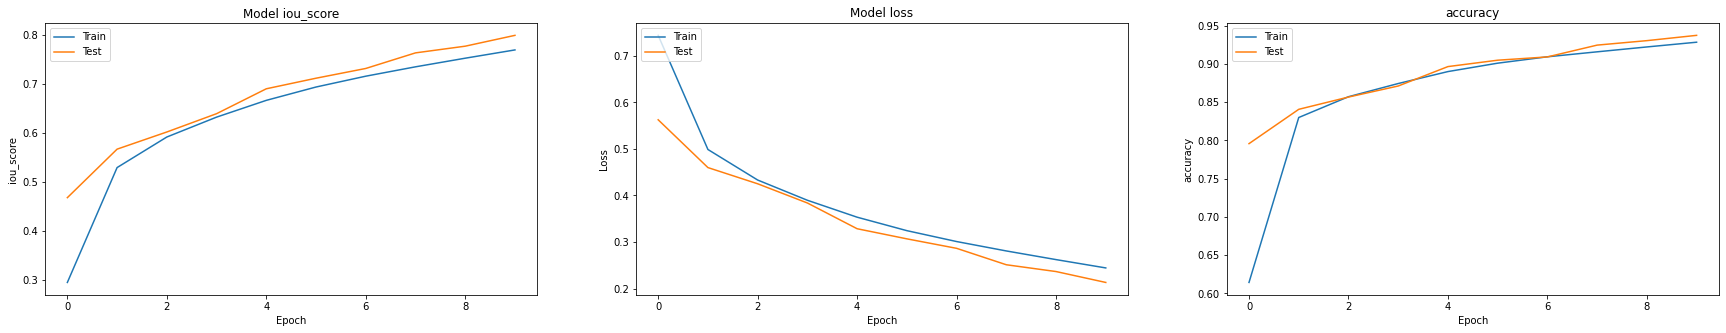

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(132)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(133)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

#### entrainement avec jeu de données augmentés


In [ ]:
from segmentation_models import get_preprocessing


In [ ]:
BACKBONE = 'resnet34'
prerpocess_input = get_preprocessing(BACKBONE)
n_classes=8

#activation = 'sigmoid' if n_classes == 1 else 'softmax'
#model_unet_prep = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
# define number of channels


# define model
model_unet_prep = sm.Unet('resnet34', encoder_weights='imagenet',classes=8,activation='softmax')



85532672/85521592 [==============================] - 1s 0us/step


In [ ]:
model_unet_prep.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_102 (ZeroPadding (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_102[0][0]         
____________________________________________________________________________________________

In [ ]:
mc = ModelCheckpoint(mode='max', filepath='/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/sm_unet_augV2.h5', 
                     monitor='val_iou_score',
                     save_best_only='True',
                     verbose=1)

es = EarlyStopping(mode='max', monitor='val_iou_score', patience=4, verbose=1) 
callbacks = [mc,es]

In [ ]:
model_unet_prep.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"],
)

In [ ]:
history_aug = model_unet_prep.fit(train_gen,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=val_gen,
                                  validation_steps=validation_steps,
                                  epochs=EPOCHS,
                                  use_multiprocessing=True,
                                  workers=8,
                                  callbacks=callbacks)

In [ ]:
scores = model_unet_prep.evaluate(test_gen)
metrics=[sm.metrics.iou_score, "accuracy"]
print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
  try :
    print("mean {}: {:.5}".format(metric.__name__, value))
  except AttributeError:
    print("mean {}: {:.5}".format(metric, value))
    continue

30/30 [==============================] - 225s 8s/step - loss: 0.2606 - iou_score: 0.7536 - accuracy: 0.9258
Loss: 0.26064
mean iou_score: 0.75363
mean accuracy: 0.92585


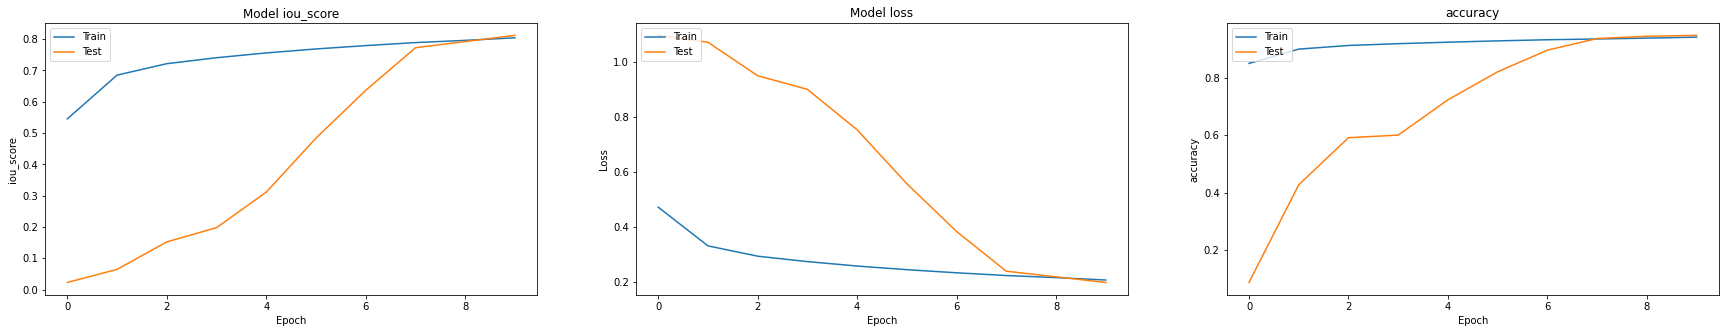

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.plot(history_aug.history['iou_score'])
plt.plot(history_aug.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(132)
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(133)
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

|         Model       |temps de déployement |Metrique : Accuracy  | Metrique : IOU SCORE|   Remarque 
|----------------|-------------------------------|-----------------------------|----------------------------|----------------------------|
|Unet model  |5 H 14'             |0.91| 0.71 | Bon résultat pour un premier essai nous tentons une approche avec augmentation du jeu de donnée
|Unet model avec augmentation d'image     |6 H 32'       |      0.75     |0.92
|     FPN   fine tune |resultat en cours`|resultat en cours|resultat en cours|
|     FPN  fine tune avec augmentation d'image  |resultat en cours`|resultat en cours |resultat en cours|



## Model 2 : FPN

In [ ]:
BACKBONE = 'resnet34'
# preprocess_input = sm.get_preprocessing(BACKBONE)


# define model
model_ft = sm.FPN(BACKBONE, encoder_weights='imagenet', classes=8, encoder_freeze=True)
model_ft.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"],
)
model_ft.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_34 (ZeroPadding2 (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_34[0][0]          
____________________________________________________________________________________________

In [ ]:
mc = ModelCheckpoint(mode='max', filepath='/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/fpn_fine_tune_new.h5', monitor='val_iou_score', save_best_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='val_iou_score', patience=4, verbose=1) 
callbacks = [mc,es]

In [ ]:
history = model_ft.fit(train_gen_aug,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_gen,
                    validation_steps=validation_steps,
                    epochs=EPOCHS,
                    use_multiprocessing=True,
                    workers=8,
                    callbacks=[callbacks])

Epoch 1/20
150/150 [==============================] - 3174s 21s/step - loss: 0.4169 - iou_score: 0.6029 - accuracy: 0.8624 - val_loss: 1.2057 - val_iou_score: 0.0556 - val_accuracy: 0.1983

Epoch 00001: val_iou_score improved from -inf to 0.05558, saving model to /content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/fpn_fine_tune_new.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
150/150 [==============================] - 3174s 21s/step - loss: 0.3409 - iou_score: 0.6754 - accuracy: 0.8957 - val_loss: 1.0416 - val_iou_score: 0.0831 - val_accuracy: 0.3118

Epoch 00002: val_iou_score improved from 0.05558 to 0.08310, saving model to /content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/fpn_fine_tune_new.h5
Epoch 3/20
150/150 [==============================] - 3170s 21s/step - loss: 0.3038 - iou_score: 0.7107 - accuracy: 0.9094 - val_loss: 1.1158 - val_iou_score: 0.0735 - val_accuracy: 0.4202

Epoch 00003: val_iou_score did not improve from 0.08310
Epoch 4/20
150/150 [==============================] - 3138s 21s/step - loss: 0.2770 - iou_score: 0.7362 - accuracy: 0.9196 - val_loss: 1.0517 - val_iou_score: 0.1097 - val_accuracy: 0.4573

Epoch 00004: val_iou_score improved from 0.08310 to 0.10970, saving model to /content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/fpn_fine_tune_new.h5
Epoch 5/20
150/150 [============================

### import du modele

In [24]:
best_model_tune = tf.keras.models.load_model('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/fpn_fine_tune_new.h5',
                                        custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                        'iou_score': sm.metrics.iou_score})

In [51]:
scores = best_model_tune.evaluate(test_gen)
metrics=[sm.metrics.iou_score, "accuracy"]
print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
  try :
    print("mean {}: {:.5}".format(metric.__name__, value))
  except AttributeError:
    print("mean {}: {:.5}".format(metric, value))
    continue

21/30 [====================>.........] - ETA: 3:42 - loss: 0.3502 - iou_score: 0.6752 - accuracy: 0.8842

UnknownError: ignored

## Environnement deploiement azure

### Les bibliothèques

In [56]:
!pip install azureml-dataset-runtime --upgrade

     |████████████████████████████████| 39.4 MB 114.0 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 28.7 MB 1.1 MB/s 
     |████████████████████████████████| 1.3 MB 56.1 MB/s 
     |████████████████████████████████| 10.9 MB 26.8 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 176 kB 79.8 MB/s 
     |████████████████████████████████| 3.5 MB 64.2 MB/s 
     |████████████████████████████████| 3.0 MB 71.6 MB/s 


In [57]:
!pip install azureml.core

     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 796 kB 70.0 MB/s 
     |████████████████████████████████| 40 kB 5.5 MB/s 
     |████████████████████████████████| 547 kB 68.4 MB/s 
     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 141 kB 78.7 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 314 kB 77.4 MB/s 
     |████████████████████████████████| 1.3 MB 66.6 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 101 kB 12.6 MB/s 
     |████████████████████████████████| 145 kB 77.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 546 kB 76.4 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 


In [58]:
import pickle
import matplotlib.pyplot as plt
import azureml
import joblib
from azureml.core import Experiment, Datastore, Dataset, Environment, Workspace, Run 
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException
from azureml.core.webservice import AciWebservice, Webservice
from azureml.core.model import InferenceConfig, Model
import azureml.core
import json
from azureml.core.compute import AksCompute, ComputeTarget
from azureml.core.webservice import AksWebservice
%matplotlib inline

### Mise en place de l'espace de travail

In [59]:
ws = Workspace.from_config("/content/drive/MyDrive/data/config.json")

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code RHJDERRJN to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...
Interactive authentication successfully completed.


In [60]:
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep = '\n')

ctycscapesegm
scape_segmentation_OC
westus2
d0c5573e-df27-424f-ad4b-0b68fcdcc2b9


### Methode d'import dans le registre model

In [ ]:
best_modele = tf.keras.models.load_model('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/sm_unet_custom.h5',
                                        custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                        'iou_score': sm.metrics.iou_score})

In [ ]:
best_model_tune = tf.keras.models.load_model('/content/drive/MyDrive/OC_Aurelien_MIMOUNI/P08_Aurélien_MIMOUNI/fpn_fine_tune.h5',
                                        custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                        'iou_score': sm.metrics.iou_score})

In [ ]:
best_modele.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"],
)

In [54]:
tf.keras.models.save_model(best_model_tune, './saved_model/')

INFO:tensorflow:Assets written to: ./saved_model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!mkdir -p saved_model


In [ ]:
best_modele.save('saved_model/best_modele')


In [ ]:
newmd= tf.keras.models.load_model('./saved_models',custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
'iou_score': sm.metrics.iou_score})

In [ ]:
model = Model.register(ws, 
                       model_name="unetmodel",
                       model_path='./saved_models/',
                       tags={'Accuracy': "0.89", 'IOU SCORE': "0.71"},
                       description=" model to predict image segmentation basé sur UNET ",

                       )

Registering model unetmodel


In [ ]:
finetune= tf.keras.models.load_model('./saved_model',custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
'iou_score': sm.metrics.iou_score})

In [63]:
model = Model.register(ws, 
                       model_name="finetune",
                       model_path='./saved_model/',
                       tags={'Accuracy': "0.91", 'IOU SCORE': "0.67"},
                       description=" model to predict image segmentation basé sur finetune ",

                       )

Registering model finetune


In [62]:
print(model.name, model.id, model.version, sep='\t')

unetmodel	unetmodel:3	3


In [ ]:
# create experiment and start logging to a new run in the experiment
experiment_name = "seg_from_az"
exp = Experiment(workspace=ws, name=experiment_name)
run = exp.start_logging(snapshot_directory=None)

In [ ]:
import sys 

In [ ]:
sys.setrecursionlimit(10000)


In [ ]:
model = Model.register(model_path="fine_tune_prep.pkl",
                       model_name="best_model_tune",
                       tags={'Accuracy': "0.89", 'IOU SCORE': "0.71"},
                       description=" model to predict image segmentation basé sur UNET ",
                       workspace=ws)

Registering model best_model_tune


### Creation du fichier script 

In [ ]:
%%writefile score.py
import joblib
import json
import numpy as np
import os
import pickle
import tensorflow as tf
from tensorflow import keras
import segmentation_models as sm
sm.set_framework('tf.keras')
import time
import codecs
from azureml.core.model import Model
 


def init():
    global modele,modelfine
    # Here "my_first_model" is the name of the model registered under the workspace.
    # This call will return the path to the .pkl file on the local disk.
    # Get the path to the registered model file and load it
    print ("model initialized" + time.strftime("%H:%M:%S"))
    
    model_root = Model.get_model_path('unetmodel')
    modele=tf.keras.models.load_model(model_root,custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                                 'iou_score': sm.metrics.iou_score})
    
    model_root_fine = Model.get_model_path('finetune')
    modelfine=tf.keras.models.load_model(model_root,custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                                 'iou_score': sm.metrics.iou_score})
    # the name of the folder in which to look for tensorflow model files
    #model_name = 'best_model_unet_prep'
    #model_root = os.getenv('AZUREML_MODEL_DIR')
    # the name of the folder in which to look for tensorflow model files
    #tf_model_folder = 'model'
    
    #tf_model = tf.saved_model.load(os.path.join(model_root, 'finetune'))
    #tf_model = tf.saved_model.load(os.getenv(model_root), 'best_model_fpn_fine_tune.h5')
    #model = tf.saved_model.load(os.path.join(model_root, model_name))
    #model = tf.saved_model.load(os.getenv('AZUREML_MODEL_DIR'), 'unet_prep.pkl')
    #model_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'fine_tune_prep.pkl')
    #model_path = Model.get_model_path('fine_tune_prep.pkl')

    
    #model = joblib.load(model_path)


# Note you can pass in multiple rows for scoring.
def run(input_data):
    try:
        data = np.array(json.loads(input_data)['data'], dtype=np.float32)
        #decodedArrays = json.loads(input_data, cls=PythonObjectDecoder)
        #finalNumpyArray = decodedArrays["data"]
        #data = json.loads(input_data)['data']
        #dta = np.array(finalNumpyArray)
        ls = np.expand_dims(data, axis=0)
        #result = finalNumpyArray
        result1 = modele.predict(ls)
        result2 = modelfine.predict(ls)
        
        
        return json.dumps({"result1": result1.tolist(),"result2": result2.tolist()})
        #return y_hat.tolist()
    except Exception as e:
        y_hat = str(e)
        # return error message back to the client
        return json.dumps({"error": y_hat})

Overwriting score.py


#### Fichier propriété


In [ ]:
from azureml.core.conda_dependencies import CondaDependencies

myenv = CondaDependencies.create(conda_packages=['numpy','scikit-learn',
                                                 'joblib'],
                                 pip_packages=['azureml-defaults','tensorflow<=2.6.0','dill','segmentation_models'])

with open("myenv.yml","w") as f:
    f.write(myenv.serialize_to_string())

### mise en place de l'inférence

In [ ]:
from azureml.core.environment import Environment
from azureml.core.model import InferenceConfig

myenv = Environment.from_conda_specification(name="myenv", file_path="myenv.yml")
inference_config = InferenceConfig(entry_script="score.py", environment=myenv)

In [ ]:
from azureml.core.webservice import AciWebservice

aci_deployment_config = AciWebservice.deploy_configuration(cpu_cores=1,
                                                           memory_gb=1,
                                                           tags={'cityscape': "label", 'type': "UNET-FPN fine tune"},
                                                           description="Predict label image using deep learning model",
                                                           enable_app_insights=True)

### Création d'un cluster de travail 

In [ ]:
from azureml.core.compute import ComputeTarget, AksCompute
from azureml.core.compute_target import ComputeTargetException

aks_name = "my-aks-insights"

creating_compute = False
try:
    aks_target = ComputeTarget(ws, aks_name)
    print("Using existing AKS compute target {}.".format(aks_name))
except ComputeTargetException:
    print("Creating a new AKS compute target {}.".format(aks_name))

    # Use the default configuration (can also provide parameters to customize).
    prov_config = AksCompute.provisioning_configuration()
    aks_target = ComputeTarget.create(workspace=ws,
                                      name=aks_name,
                                      provisioning_configuration=prov_config)
    creating_compute = True

Using existing AKS compute target my-aks-insights.


In [ ]:
%%time
if creating_compute and aks_target.provisioning_state != "Succeeded":
    aks_target.wait_for_completion(show_output=True)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


In [ ]:
aks_deployment_config = AksWebservice.deploy_configuration(enable_app_insights=True)

#### Deploiement du modèle sur azure

In [ ]:
model = ws.models['unetmodel']

In [ ]:
modelfine = ws.models['finetune']

In [ ]:
if aks_target.provisioning_state == "Succeeded":
    aks_service_name = "aks-service-appinsights"
    aks_service = Model.deploy(ws,
                               aks_service_name,
                               [model,modelfine],
                               inference_config,
                               aks_deployment_config,
                               deployment_target=aks_target,
                               overwrite=True)
    aks_service.wait_for_deployment(show_output=True)
    print(aks_service.state)
else:
    raise ValueError("AKS cluster provisioning failed. Error: ", aks_target.provisioning_errors)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-09-27 12:50:11+00:00 Creating Container Registry if not exists.
2021-09-27 12:50:11+00:00 Registering the environment.
2021-09-27 12:50:15+00:00 Use the existing image..
2021-09-27 12:50:18+00:00 Checking the status of deployment aks-service-appinsights..
2021-09-27 12:51:08+00:00 Checking the status of inference endpoint aks-service-appinsights.
Succeeded
AKS service creation operation finished, operation "Succeeded"
Healthy


### Zone de déboggage 

In [ ]:
print(aks_service.get_logs())

### Test

In [ ]:
print(aks_service.scoring_uri)

http://40.125.114.201:80/api/v1/service/aks-service-appinsights/score


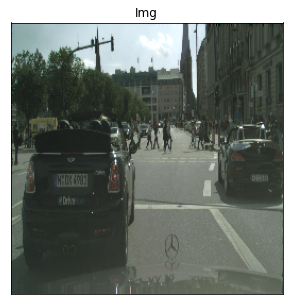

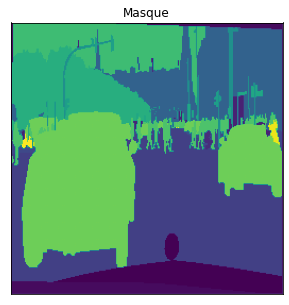

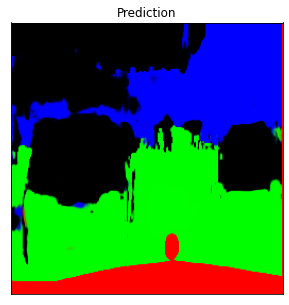

(256, 256, 8)

In [ ]:
it = img_to_array(load_img(f'{image_list_test[5]}', target_size=(img_height, img_width)))/255.
it_comp = img_to_array(load_img(f'{mask_list_test[5]}', target_size=(img_height, img_width), color_mode='grayscale'))/255.
trs = get_validation_augmentation() #training_augmentation()
sample = trs(image=it)
msk = trs(image=it_comp)
test_mask = np.squeeze(it_comp)


it = sample['image']
maskit = sample['image']
test_pred = best_modele.predict(np.expand_dims(it, axis=0)).squeeze()
visualize(img=it)
visualize(masque=test_mask)
visualize(prediction=test_pred[:,:,:3])
it.shape
it_comp.shape
test_pred.shape

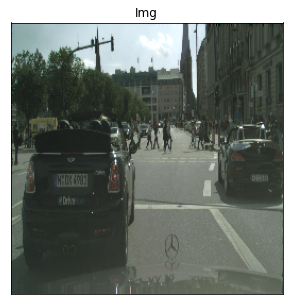

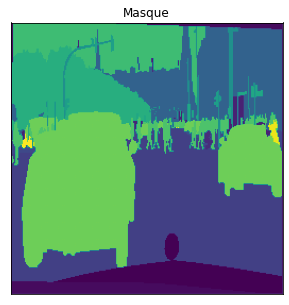

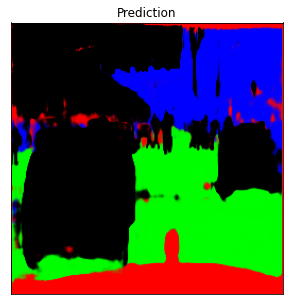

(256, 256, 8)

In [52]:
it = img_to_array(load_img(f'{image_list_test[5]}', target_size=(img_height, img_width)))/255.
it_comp = img_to_array(load_img(f'{mask_list_test[5]}', target_size=(img_height, img_width), color_mode='grayscale'))/255.
trs = get_validation_augmentation() #training_augmentation()
sample = trs(image=it)
msk = trs(image=it_comp)
test_mask = np.squeeze(it_comp)


it = sample['image']
maskit = sample['image']
test_pred = best_model_tune.predict(np.expand_dims(it, axis=0)).squeeze()
visualize(img=it)
visualize(masque=test_mask)
visualize(prediction=test_pred[:,:,:3])
it.shape
it_comp.shape
test_pred.shape

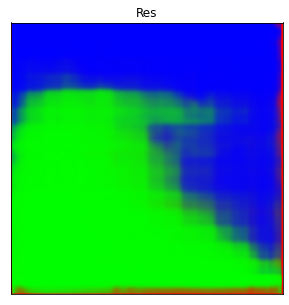

In [ ]:
#pred = eval(result.decode("utf-8"))
#pred =  json.loads(pred)

#vis = np.array(pred["predict"][0])
vis = test_pred[0]
visualize(res=vis[:,:,:3])

In [ ]:
it = json.loads(new_data.decode("utf8"))

In [ ]:
best_model_tune.predict(itt)

In [ ]:
fds = test_gen.x[2]

In [ ]:
it = img_to_array(load_img(fds))

In [ ]:
fr = test_gen[0][0][34]

In [ ]:
test_sample = json.dumps({'data': it.tolist()
})

test_sample = bytes(test_sample, encoding='utf8')

prediction = aks_service.run(input_data=test_sample)
print(prediction)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
dta = {"data": it.tolist()
}

body = str.encode(json.dumps(dta))

url = 'http://40.125.114.201:80/api/v1/service/aks-service-appinsights/score'
api_key = 'ZqWb8Vc4YstSyEeCzhO78mpETSs6pYya' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pred = eval(result.decode("utf-8"))

In [ ]:
pred =  json.loads(pred)

In [ ]:
vis = np.array(pred['result'][0])

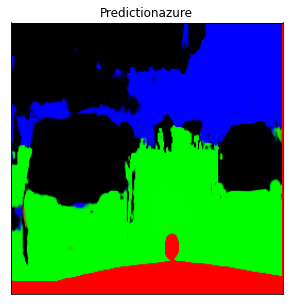

In [ ]:
visualize(predictionAZure
          =vis[:,:,:3])